In [2]:
%matplotlib inline
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import traml
import copy

In [3]:
a = traml.Stack()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |


In [37]:
a.library.search('cdzns')

|     ID | SHELF   | BOOK   | PAGE     | DESCRIPTION               |
|--------+---------+--------+----------+---------------------------|
| 114301 | main    | CdZnS  | Treharne | Treharne et al. 2014: n,k |


In [38]:
ag = 100101
sio2 = 111407
zno = 112003
cds = 114203
cdte= 116705
zns = 114301


In [33]:
a.add(cdte, film_type='absorber')

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 5                | passive   |
|   2 |     100101 | 4                | passive   |
|   3 |     112003 | 20               | passive   |
|   4 |     114203 | 30               | passive   |
|   5 |     116705 | 100              | absorber  |


In [59]:
a.library.search('cdzns')

|     ID | SHELF   | BOOK   | PAGE     | DESCRIPTION               |
|--------+---------+--------+----------+---------------------------|
| 114301 | main    | CdZnS  | Treharne | Treharne et al. 2014: n,k |


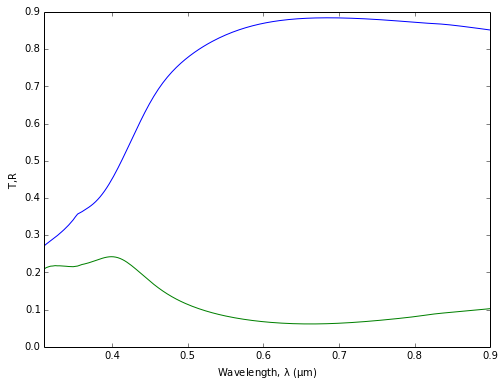

In [56]:
a.plot(o='a')

In [57]:
a.jsc()

26.0825464882 (ma/cm^2)


26.082546488213772

In [ ]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
          
        
        stack.d(i, x[i-1])
    #stack.d(1,x[0])
    #stack.d(2,x[1])
    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    min = 1-stack.average(TR, c, delta, o='a')
    #min = stack.average(TR, c, delta)
    #print min

    return min**10

In [ ]:
def minTR(stack, film_range, c, delta, TR='T'):
    print film_range
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        #print i
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append(stack.config[i][3])
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    #stack.plot()
    print layers
    return result

In [ ]:
c = traml.Stack()

peak = 0.6
delta = 0.2
mat2 = 105401 #MgF2
sio2 = 111407 #SiO2
zns = 114801 #ZnS
zno = 112003 #ZnO
mgo = 110902 #MgO
#mat1 = 110104 #Al2O3
zro2 = 112101
stack_list = []

c.add(zno, 500, bnds = (500, 2500))
c.add(CdS, 50, bnds=(25, 250))
c.add(CdTe, film_type='absorber')

stack_list.append(copy.deepcopy(c))
R=[]
point = []
point.append(c.jsc())
print point
n = [0]
it = [1]

result = minTR(c, [1,len(c.config)-2], peak, delta, TR='T')
point.append(c.jsc())
n.append(0)
stack_list.append(copy.deepcopy(c))

c.remove()
c.remove()
c.remove()

N = 10
for i in range(0, N):
    if i % 2 == 0:
        print 'even', i
        c.add(zns,10, bnds=(0,100))
    else:
        c.add(sio2,10, bnds=(0,100))
        
    c.add(zno, 500, bnds = (500, 2500))
    c.add(CdS, 50, bnds=(25, 250))
    c.add(CdTe, film_type='absorber')
    
    
    result = minTR(c, [1,len(c.config)-2], peak, delta, TR='T')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    it.append(result.nit)
    stack_list.append(copy.deepcopy(c))
    point.append(c.jsc())
    
    print c.config[i+3][1]
    
   
    c.table()
    print '============================================================================================'
    print c.average('T',peak,delta, o='a')
    
    
    if i !=N-1:
        c.remove()
        c.remove()
        c.remove()
        
    print '============================================================================================'
    
    
    
    
 